# Projeto 2 - Ciência dos Dados - 2020.2 

### Previsão da demanda em lojas Walmart estadunidenses a fim de evitar o desperdício, maximizando o lucro nesses estabelecimentos

#### Equipe: Andressa Silva de Oliveira; Camila Buzin Ladeira; Luiz Ricardo Hardman; Matheus Kwon

## - Introdução -

In [1]:
# Objetivo:

# Descrição da base de dados:

## - Minerando Dados e Características do Dataset -

In [2]:
# Bibliotecas importadas:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
import seaborn as sns

In [3]:
# Código para reconhecimento do dataset:
filename = 'Walmart_Store_sales.xlsx'

if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo!')
else:
    print(f'Não encontrei o arquivo {filename} no diretório {os.getcwd()}')

Encontrei o arquivo Walmart_Store_sales.xlsx, tudo certo!


In [4]:
# Código para leitura do dataset:
data = pd.read_excel(filename)
data.head(5)

,"Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment"
0,"1,05-02-2010,1643690.9,0,42.31,2.572,211.09635..."
1,"1,12-02-2010,1641957.44,1,38.51,2.548,211.2421..."
2,"1,19-02-2010,1611968.17,0,39.93,2.514,211.2891..."
3,"1,26-02-2010,1409727.59,0,46.63,2.561,211.3196..."
4,"1,05-03-2010,1554806.68,0,46.5,2.625,211.35014..."


In [5]:
# Manipulação do dataset para fins do projeto

linhas = data['Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment']

dicio = {'store':[], 'date':[], 'weeklysales':[], 'holiday':[], 'temperature':[], 'fuel':[], 'cpi':[], 'unemployment':[]}

# Separação das colunas no dicionário, em forma de listas

for linha in linhas:
    results = linha.split(',')
    i = 0
    for key in dicio.keys():
        variable = results[i]
        if key != 'date' and key != 'holiday' and key != 'store':
            variable = float(results[i])
        dicio[key].append(variable)
        i += 1

In [6]:
# Transformando o dicionário em dataframe:

df = pd.DataFrame()
for key, lista in dicio.items():
    df[key] = pd.Series(lista)

In [7]:
# Transformando as variáveis de acordo com o seu tipo:

df.holiday = df.holiday.astype('category') # define a característica da data(ser feriado ou não) como qualitativa
df.holiday.cat.categories = ['no', 'yes']
df.store = df.store.astype('category') # define o número da loja como variável qualitativa ordinal
df.date = pd.to_datetime(df.date) # define a variável para datas
df.unemployment = (df.unemployment)/100 # taxa de desemprego(em porcentagem)/100
df

,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment
0,1,2010-05-02,1643690.90,no,42.31,2.572,211.096358,0.08106
1,1,2010-12-02,1641957.44,yes,38.51,2.548,211.242170,0.08106
2,1,2010-02-19,1611968.17,no,39.93,2.514,211.289143,0.08106
3,1,2010-02-26,1409727.59,no,46.63,2.561,211.319643,0.08106
4,1,2010-05-03,1554806.68,no,46.50,2.625,211.350143,0.08106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,no,64.88,3.997,192.013558,0.08684
6431,45,2012-05-10,733455.07,no,64.89,3.985,192.170412,0.08667
6432,45,2012-12-10,734464.36,no,54.47,4.000,192.327265,0.08667
6433,45,2012-10-19,718125.53,no,56.47,3.969,192.330854,0.08667


#### Descrição das variáveis:

* store: representa a numeração da loja representada;

* data: variável que apresenta dia, mês e ano do dado, respectivamente;

* **weeklysales : variável que apresenta a receita de cada loja semanalmente (US\$) $\Rightarrow$ variável de monitoramento**;

* holiday: variável que representa se a data do dado é feriado ou não (yes/no);

* temperature : variável que apresenta a temperatura média do dia em cada loja, em fahrenheit (°F);

* fuel: preço do galão de gasolina no dia do dado (US\$);

* cpi : variável que representa o preço médio necessário para comprar um conjunto de bens de consumo e serviços num país no dia, comparando com períodos anteriores. (US\$);

* unemployment : variável que representa a taxa de desemprego no dia, em relação ao país, de zero a um.

### Análise descritiva detalhada das variáveis:

In [8]:
# Análise das variáveis quantitativas

df_analise1 = df[['weeklysales','temperature','fuel','cpi','unemployment']]
df_analise1.describe()

,weeklysales,temperature,fuel,cpi,unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,0.079992
std,5.643666e+05,18.444933,0.459020,39.356712,0.018759
min,2.099862e+05,-2.060000,2.472000,126.064000,0.038790
25%,5.533501e+05,47.460000,2.933000,131.735000,0.068910
50%,9.607460e+05,62.670000,3.445000,182.616521,0.078740
75%,1.420159e+06,74.940000,3.735000,212.743293,0.086220
max,3.818686e+06,100.140000,4.468000,227.232807,0.143130


In [9]:
# Verificando se há valores indefinidos

df_analise1.isnull().sum()

weeklysales     0
temperature     0
fuel            0
cpi             0
unemployment    0
dtype: int64

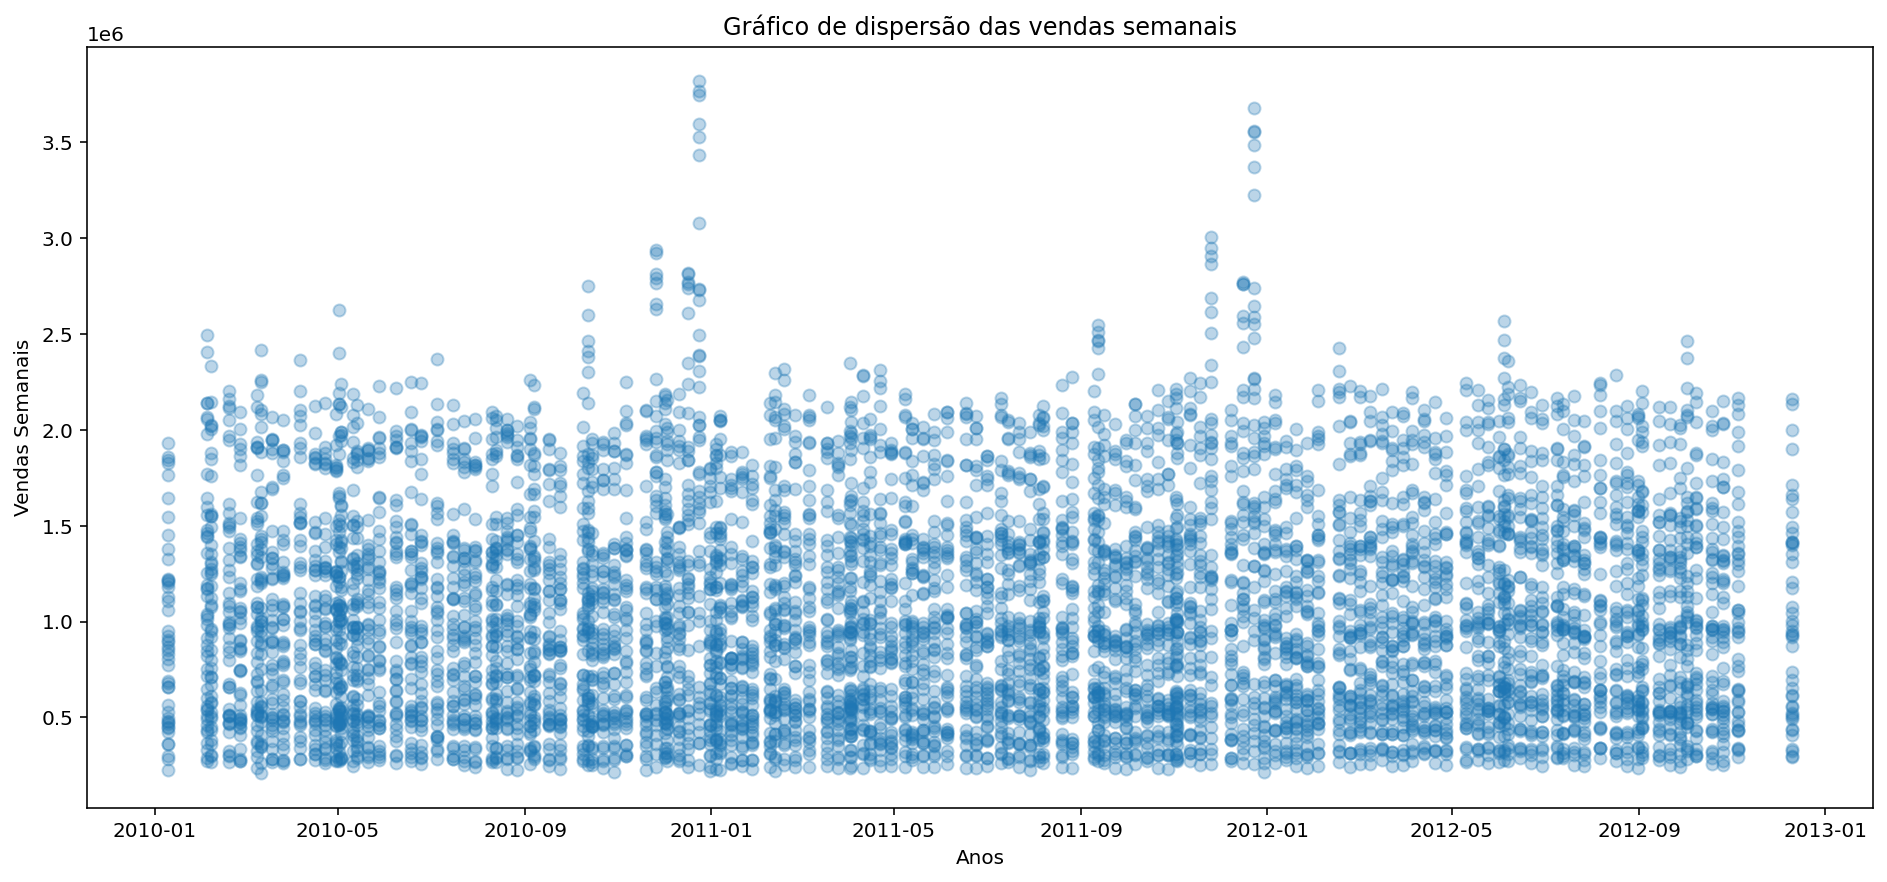

In [10]:
# Gráfico de dispersão das vendas semanais para todas as lojas ao longo do período 2010 a 2012

plt.figure(figsize=(16, 7))
plt.title('Gráfico de dispersão das vendas semanais')
plt.xlabel('Anos')
plt.ylabel('Vendas Semanais')
plt.plot(df.date, df.weeklysales, 'o', alpha=0.3)
plt.show()

* A partir do gráfico acima, percebe-se que nas semanas próximas ao fim de cada ano ocorre, em geral, um aumento nas vendas semanais

Store 19, year 2010


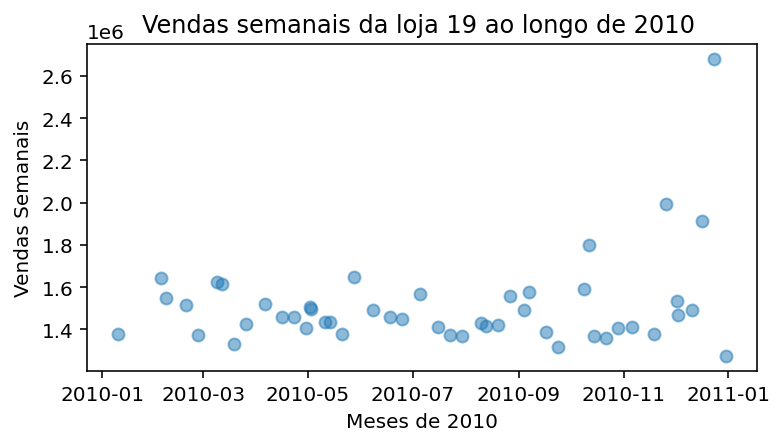

Store 8, year 2011


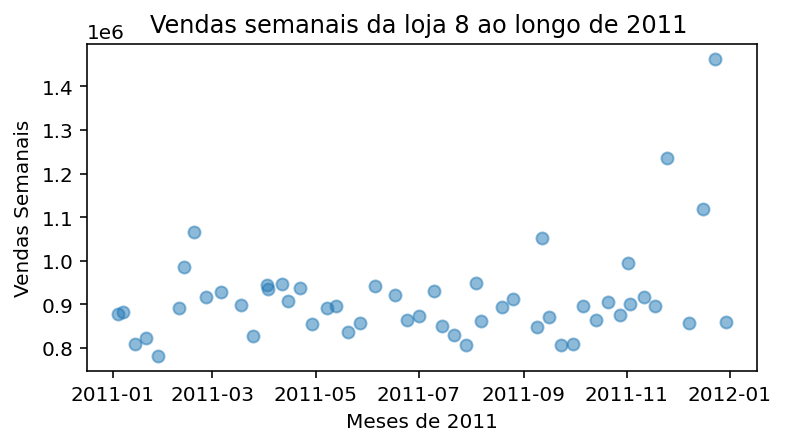

Store 10, year 2012


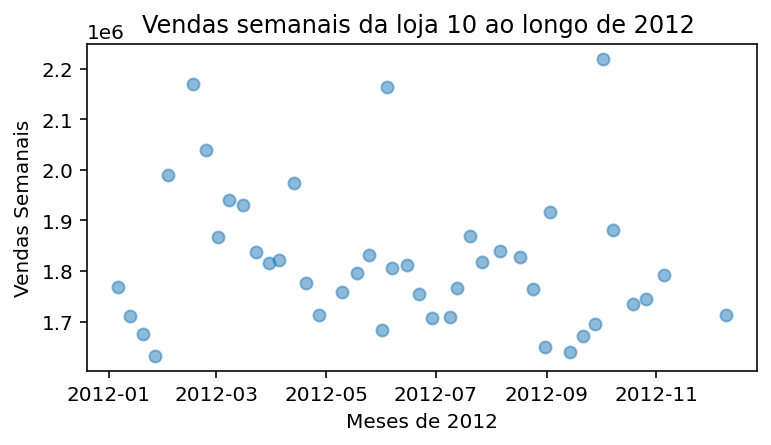

In [11]:
# Gráfico de dispersão das vendas semanais para lojas selecionadas aleatoriamente durante um ano selecionado também aleatoriamente

import random
for x in range(3):
    
    n = random.randint(1,45)
    year = random.randint(2010,2012)
    
    filtroano = []
    for i in df.date:
        if i.year == year:
            filtroano.append(True)
        else:
            filtroano.append(False)
    
    filtrostore = df.store == str(n)
    
    datesano = []
    for i in range(len(df)):
        if df.date[i].year == year and df.store[i] == str(n):
            datesano.append(df.date[i])
    
    salesyear = df.loc[filtroano & filtrostore,'weeklysales']
    
    print(f'Store {n}, year {year}')
    plt.figure(figsize=(6, 3))
    plt.title('Vendas semanais da loja {0} ao longo de {1} '.format(n,year))
    plt.ylabel('Vendas Semanais')
    plt.xlabel('Meses de {0}'.format(year))
    plt.plot(datesano, salesyear,'o', alpha=0.5)
    plt.show()

* Assim como observado no comportamento de todas as lojas juntas, percebe-se para cada loja que, em geral há um aumento nas vendas semanais no período próximo ao final do ano

In [12]:
# Análise da relação entre as variáveis weeklysales e holiday

no = df.holiday == "no"
yes = df.holiday == "yes"

holiday_no = df.loc[no,["weeklysales"]]
holiday_yes = df.loc[yes,["weeklysales"]]

medidas_resumo_holiday_no = holiday_no.describe()
medidas_resumo_holiday_yes = holiday_yes.describe()

In [13]:
# Análise das medidas resumo para semanas sem feriado

medidas_resumo_holiday_no.round(3)

,weeklysales
count,5985.000
mean,1041256.380
std,558957.436
min,209986.250
25%,551378.390
50%,956211.200
75%,1414343.530
max,3818686.450


In [14]:
# Análise das medidas resumo para semanas com feriado

medidas_resumo_holiday_yes.round(3)

,weeklysales
count,450.000
mean,1122887.892
std,627684.932
min,215359.210
25%,575865.482
50%,1018538.040
75%,1555213.175
max,3004702.330


* Analisando-se as medidas resumo obtidas acima, percebe-se que, quando há feriado, a média das vendas semanais é maior. No entanto, nessas mesmas semanas observa-se também uma variância maior, o que significa que há lojas com vendas bem maiores que outras e também que há feriados em que as vendas são maiores do que em outros.

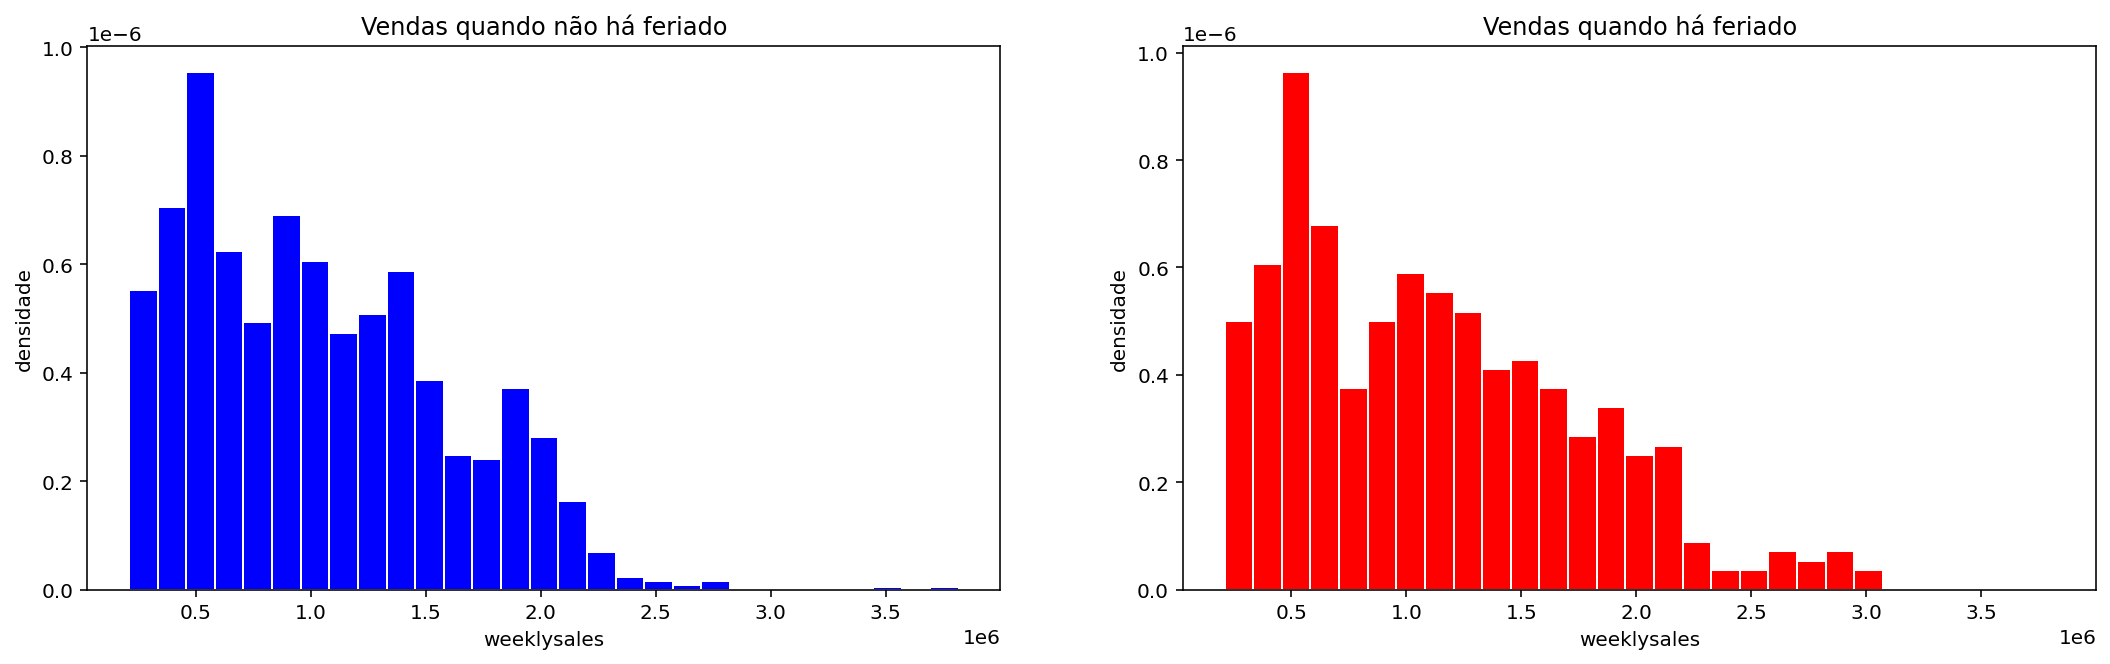

In [15]:
# Análise, em histograma, das vendas semanais para semanas em que não há ou não feriado

faixas = np.linspace(df.weeklysales.min(),df.weeklysales.max(),30)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(holiday_no.weeklysales, bins=faixas, density=True, color='blue', edgecolor='white')
plt.ylabel('densidade')
plt.xlabel('weeklysales')
plt.title('Vendas quando não há feriado')

plt.subplot(122)
plt.hist(holiday_yes.weeklysales, bins=faixas, density=True, color='red', edgecolor='white')
plt.ylabel('densidade')
plt.xlabel('weeklysales')
plt.title('Vendas quando há feriado')

plt.show()

In [16]:
# Criando faixas de temperatura correspondentes às estações - temperatura mínima a 40° F, 40° F a 55° F, 55° F a temperatura máxima

temp_minima = df.temperature.min()
temp_maxima = df.temperature.max()

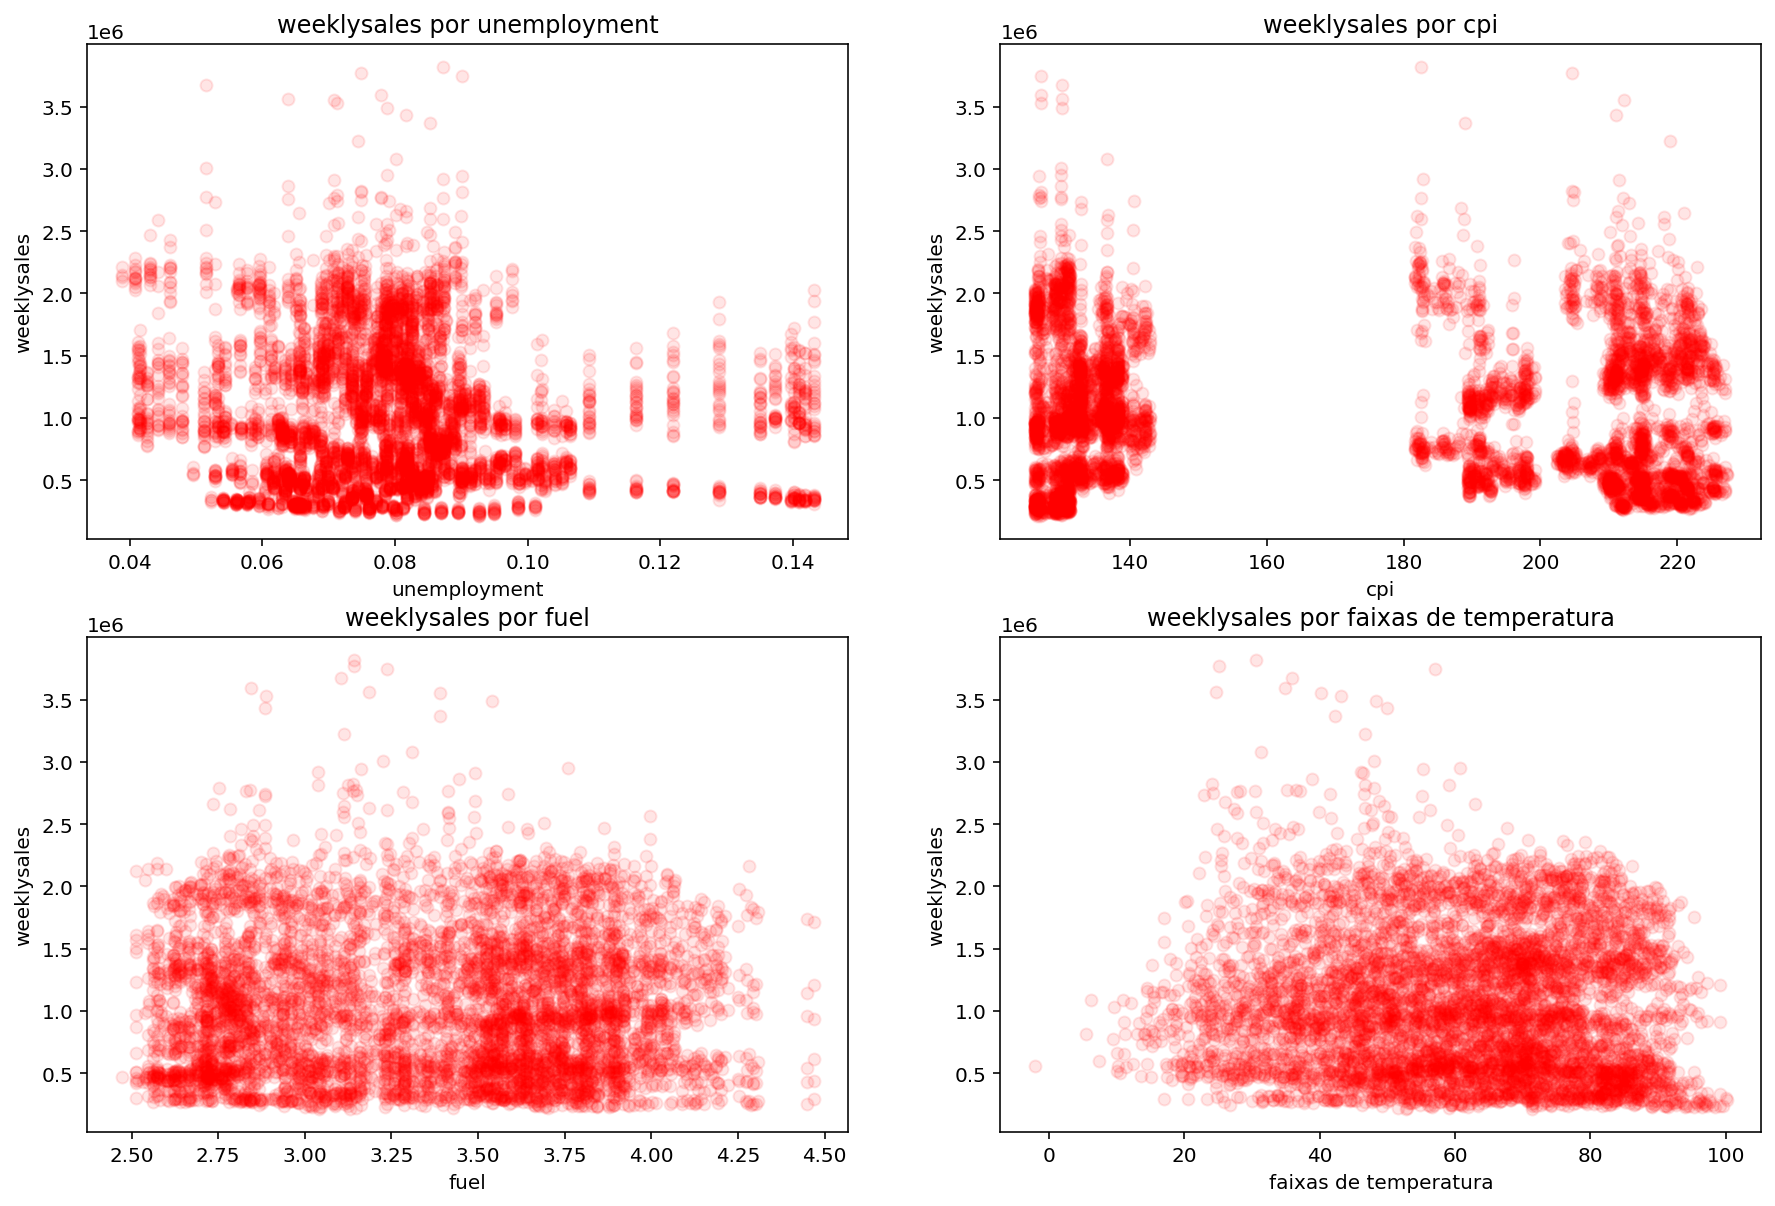

In [17]:
fig = plt.figure(figsize=(15,10))

# weeklysales com unemployment
plt.subplot(221)
plt.scatter(df.unemployment, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por unemployment')
plt.ylabel('weeklysales')
plt.xlabel('unemployment')

# weeklysales com cpi
plt.subplot(222)
plt.scatter(df.cpi, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por cpi')
plt.ylabel('weeklysales')
plt.xlabel('cpi')

# weeklysales com fuel
plt.subplot(223)
plt.scatter(df.fuel, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por fuel')
plt.ylabel('weeklysales')
plt.xlabel('fuel')

# weeklysales com temperature
plt.subplot(224)
plt.scatter(df.temperature, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por faixas de temperatura')
plt.ylabel('weeklysales')
plt.xlabel('faixas de temperatura')

plt.show()

In [18]:
# As correlações
nomes = ['unemployment','cpi', 'fuel', 'temperature']
dfs = [df.unemployment, df.cpi, df.fuel, df.temperature]
for i in range(len(nomes)):
    print('Correlação entre {0} e weeklysales é: {1}'.format(nomes[i], df.weeklysales.corr(dfs[i])))

Correlação entre unemployment e weeklysales é: -0.10617608965795428
Correlação entre cpi e weeklysales é: -0.07263416204017631
Correlação entre fuel e weeklysales é: 0.009463786314475114
Correlação entre temperature e weeklysales é: -0.06381001317946956


* As correlações nos mostram uma baixa relação entre as features e o target. Sendo assim, teremos que fazer uma análise de múltiplas features

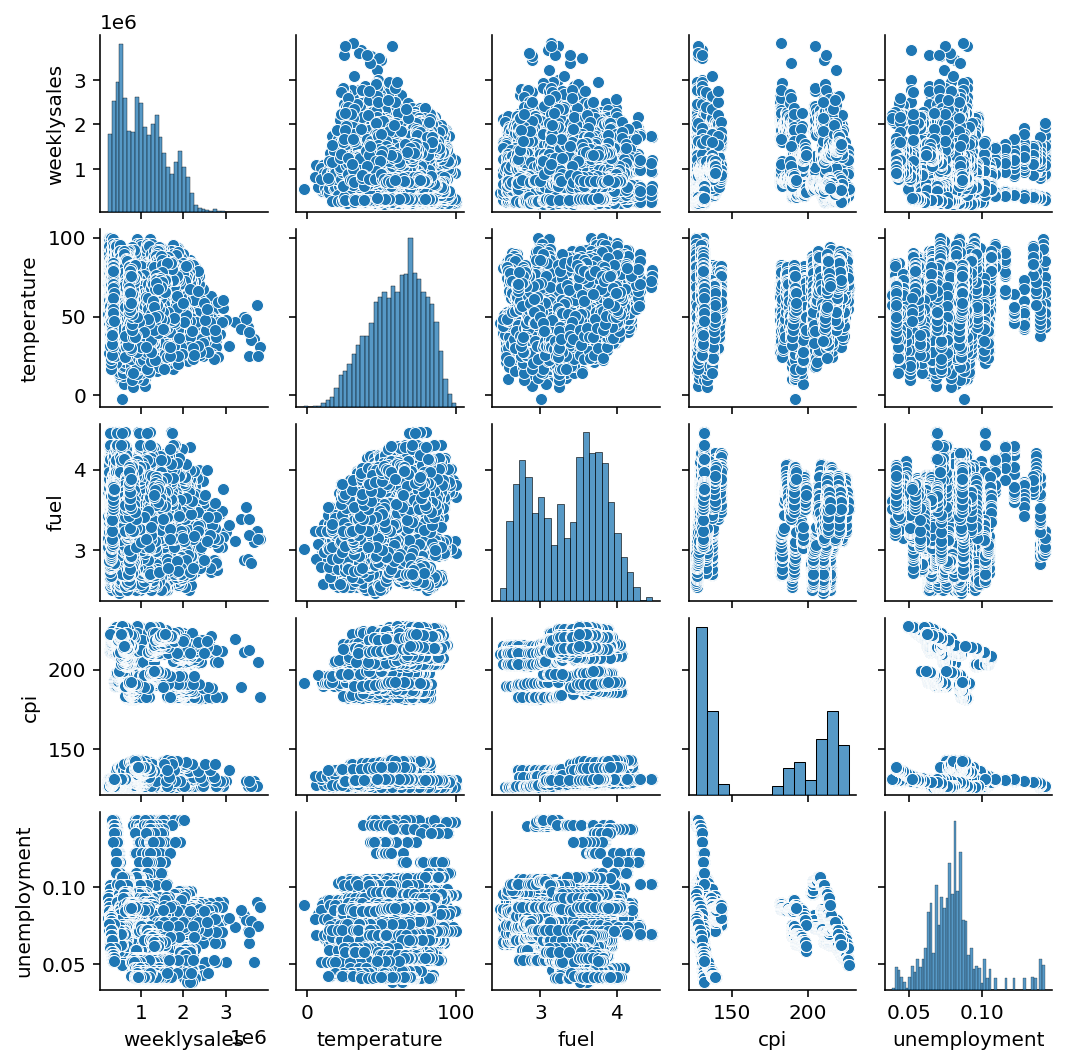

In [19]:
sns.pairplot(df, height=1.5);

## - Modelos de Predição -

* 1° modelo a ser utilizado: Modelo de Regressão Linear Múltipla - adotando $α = 1%$

* Hipóteses:

**H0: não há relação entre weeklysales e a variável analisada - $β = 0$**

**H1: há relação entre weeklysales e a variável analisada - $β ≠ 0$**

In [20]:
# Regressão linear múltipla para a combinação weeklysales com temperature, fuel, cpi e unemployment - todas as variáveis quantitativas

x = df[['temperature','fuel','cpi','unemployment']]
y = df['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     40.09
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           3.21e-33
Time:                        20:12:19   Log-Likelihood:                -94273.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.744e+06   7.96e+04     21.918      0.000    1.59e+06     1.9e+06
temperature   -885.6699    396.195     -2.235      0.025   -1662.345    -108.995
fuel         -1.225e+04   1.58e+04     -0.778      0.437   -4.31e+04    1.86e+04
cpi          -1585.8180    195.164     -8.126      0.000   -1968.404   -1203.232
unemployment -4.121e+06   3.97e+05    -10.375      0.000    -4.9e+06   -3.34e+06
==============================================================================
Omnibus:                      370.623   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.779
Skew:                           0.639   Prob(JB):                     8.66e-96
Kurtosis:                       3.010   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* A probabilidade de |t| de fuel é muito maior do que o alpha adotado, então, como H0 não é rejeitado, conclui-se que não há relação significativa para o modelo entre weeklysales e fuel

In [21]:
# Regressão linear múltipla para a combinação weeklysales com temperature, cpi e unemployment

x = df[['temperature','cpi','unemployment']]
y = df['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     53.25
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           5.43e-34
Time:                        20:12:19   Log-Likelihood:                -94273.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6431   BIC:                         1.886e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.697e+06   5.24e+04     32.367      0.000    1.59e+06     1.8e+06
temperature   -947.0689    388.235     -2.439      0.015   -1708.140    -185.998
cpi          -1550.7795    189.885     -8.167      0.000   -1923.016   -1178.543
unemployment -4.083e+06   3.94e+05    -10.359      0.000   -4.86e+06   -3.31e+06
==============================================================================
Omnibus:                      372.252   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.011
Skew:                           0.640   Prob(JB):                     2.84e-96
Kurtosis:                       3.013   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* A probabilidade de |t| de temperature é muito maior do que o alpha adotado, então, como H0 não é rejeitado, conclui-se que não há relação significativa para o modelo entre weeklysales e fuel

In [22]:
# Regressão linear múltipla para a combinação weeklysales com cpi e unemployment

x = df[['cpi','unemployment']]
y = df['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     76.84
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           1.05e-33
Time:                        20:12:19   Log-Likelihood:                -94276.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6432   BIC:                         1.886e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.67e+06   5.12e+04     32.588      0.000    1.57e+06    1.77e+06
cpi          -1652.0937    185.358     -8.913      0.000   -2015.457   -1288.730
unemployment -4.241e+06   3.89e+05    -10.906      0.000      -5e+06   -3.48e+06
==============================================================================
Omnibus:                      372.804   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.398
Skew:                           0.640   Prob(JB):                     2.34e-96
Kurtosis:                       3.060   Cond. No.                     9.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Verificando as suposições do modelo de regressão linear 

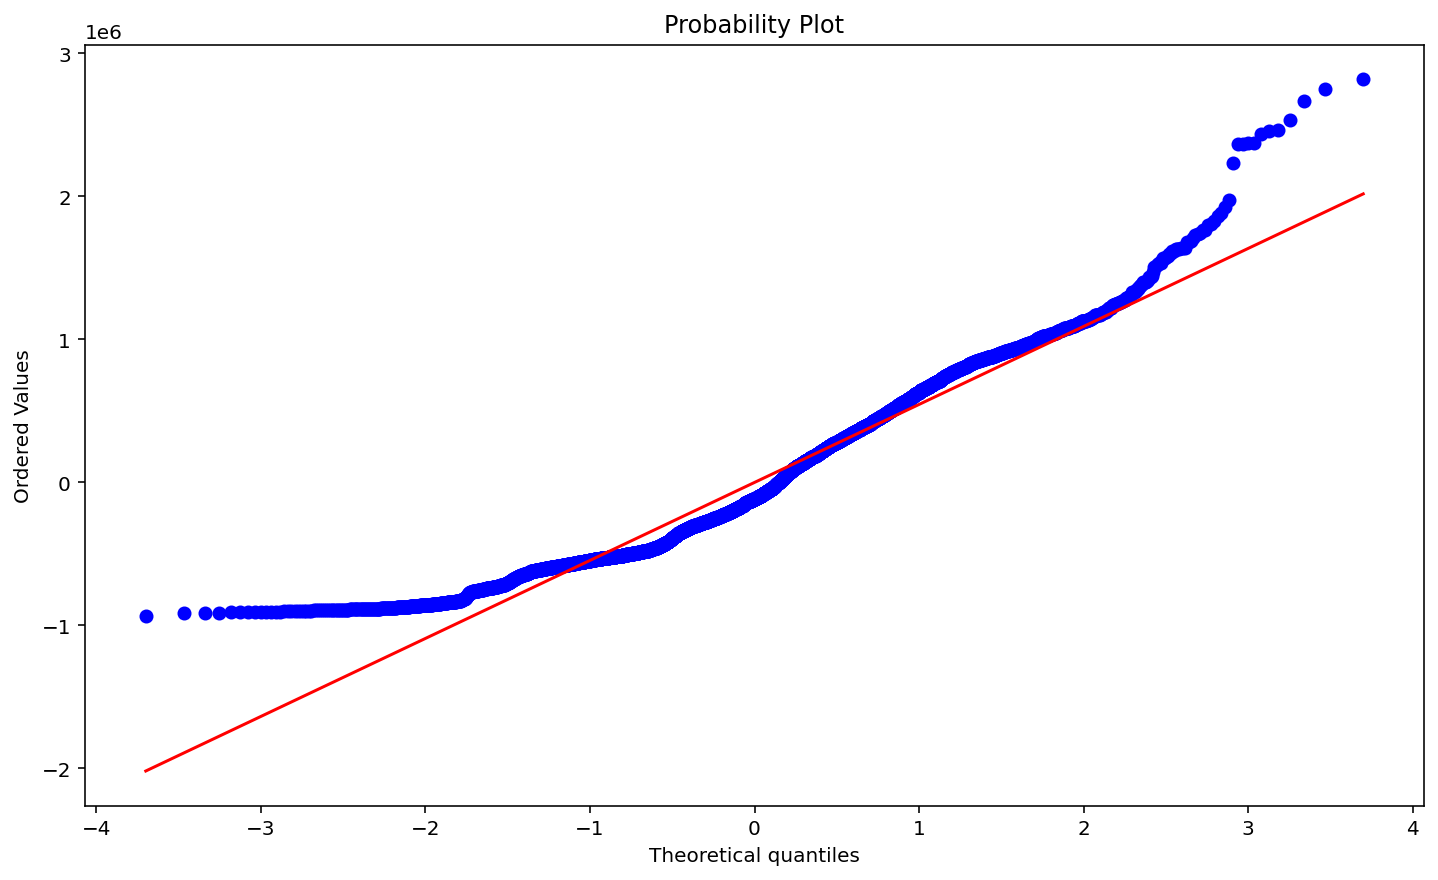

In [23]:
# Verificando a suposição de que os erros têm distribuição Normal

stats.probplot(results.resid, dist='norm', plot=plt);

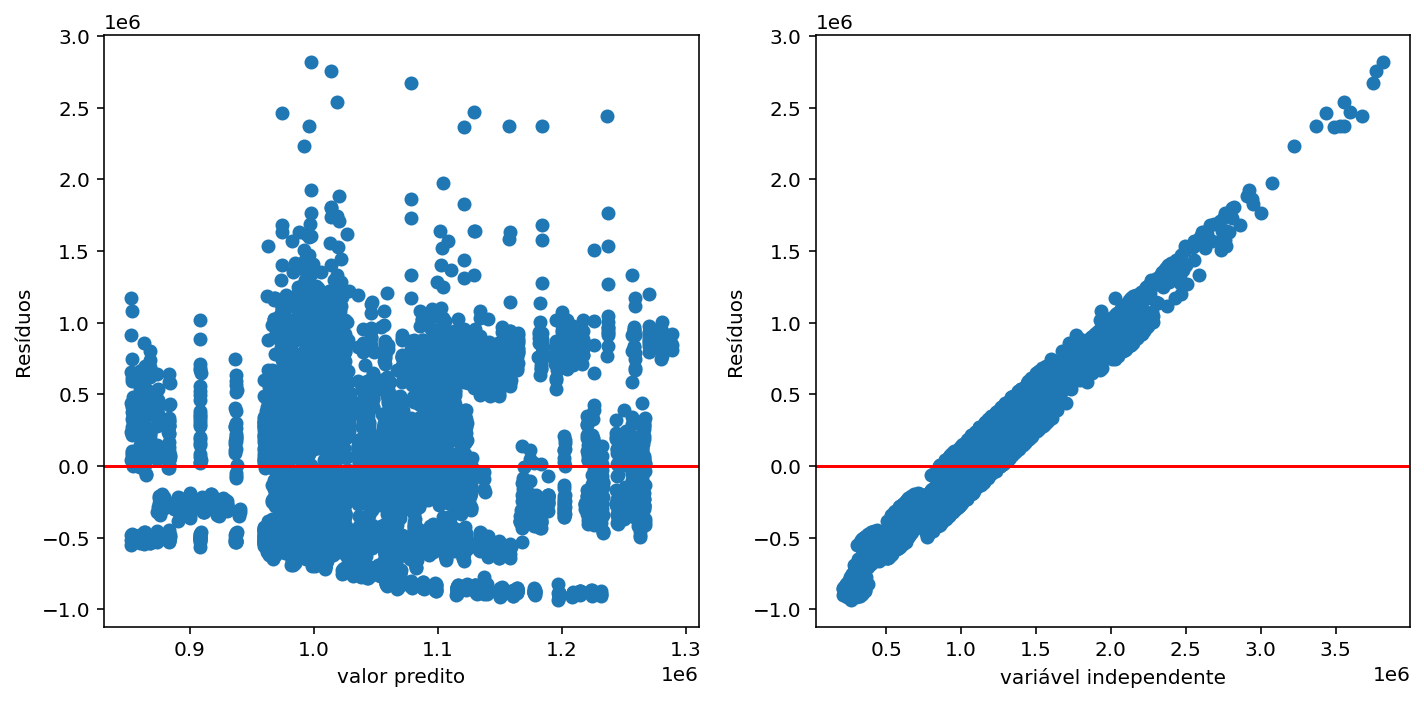

In [24]:
# Verificando a suposição de homocedasticidade:

fig = plt.figure(figsize = (10,5))

plt.subplot(121)
plt.scatter( results.predict(xc), results.resid);
plt.axhline(y = 0, color = 'r', linestyle = '-');
plt.ylabel('Resíduos')
plt.xlabel('valor predito')

plt.subplot(122)
plt.scatter(y, results.resid);
plt.axhline(y = 0, color = 'r', linestyle = '-'); # o valor da variável aleatórias está correto ?
plt.ylabel('Resíduos')
plt.xlabel('variável independente')

plt.tight_layout()
plt.show()

* Como evidenciado nos gráficos acima, as hipóteses do modelo não são seguidas. Dessa forma, afim de tentar ajustá-las, utilizou-se a escala logarítmica como ilustrado abaixo:

In [25]:
# Retira valores abaixo de 0

filtrotemperature = df.temperature > 0
df_log = df.loc[filtrotemperature,:]

In [26]:
# Alterando a escala para log

df_log.weeklysales = np.log(df_log.weeklysales)
df_log.temperature = np.log(df_log.temperature)
df_log.fuel = np.log(df_log.fuel)
df_log.cpi = np.log(df_log.cpi)
df_log.unemployment = np.log(df_log.unemployment*100)
df_log

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment
0,1,2010-05-02,14.312455,no,3.745023,0.944684,5.352315,2.092605
1,1,2010-12-02,14.311400,yes,3.650918,0.935309,5.353005,2.092605
2,1,2010-02-19,14.292966,no,3.687128,0.921875,5.353228,2.092605
3,1,2010-02-26,14.158907,no,3.842244,0.940398,5.353372,2.092605
4,1,2010-05-03,14.256862,no,3.839452,0.965081,5.353516,2.092605
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,13.477481,no,4.172539,1.385544,5.257566,2.161482
6431,45,2012-05-10,13.505522,no,4.172694,1.382537,5.258383,2.159523
6432,45,2012-12-10,13.506897,no,3.997650,1.386294,5.259198,2.159523
6433,45,2012-10-19,13.484400,no,4.033710,1.378514,5.259217,2.159523


In [27]:
df_analise2 = df_log[['weeklysales','temperature','fuel','cpi','unemployment']]
df_analise2.describe()

,weeklysales,temperature,fuel,cpi,unemployment
count,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000
mean,13.701981,4.047785,1.201958,5.118160,2.053714
std,0.588318,0.364977,0.139431,0.232645,0.224866
min,12.254797,1.711995,0.905028,4.836790,1.355577
25%,13.223416,3.860624,1.076026,4.880792,1.930216
50%,13.775569,4.137963,1.237359,5.207388,2.063566
75%,14.166366,4.316755,1.317748,5.360095,2.154317
max,15.155417,4.606569,1.496941,5.425975,2.661168


In [28]:
# Verificando se há valores indefinidos

df_analise2.isnull().sum()

weeklysales     0
temperature     0
fuel            0
cpi             0
unemployment    0
dtype: int64

In [29]:
logx =  df_log[['temperature','fuel','cpi','unemployment']]
logy = df_log['weeklysales']

logxc = sm.add_constant(logx)
logmodel = sm.OLS(logy,logxc)
logresults = logmodel.fit()
logresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     29.35
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           3.21e-24
Time:                        20:12:21   Log-Likelihood:                -5657.6
No. Observations:                6434   AIC:                         1.133e+04
Df Residuals:                    6429   BIC:                         1.136e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.6467      0.221     70.837      0.000      15.214      16.080
temperature     -0.0830      0.021     -3.990      0.000      -0.124      -0.042
fuel             0.0260      0.054      0.479      0.632      -0.080       0.132
cpi             -0.2190      0.034     -6.490      0.000      -0.285      -0.153
unemployment    -0.2529      0.034     -7.426      0.000      -0.320      -0.186
==============================================================================
Omnibus:                      547.092   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.210
Skew:                          -0.313   Prob(JB):                     5.17e-57
Kurtosis:                       2.241   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
logx = df_log[['temperature','cpi','unemployment']]
logy = df_log['weeklysales']

logxc = sm.add_constant(logx)
logmodel = sm.OLS(logy,logxc)
logresults = logmodel.fit()
logresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     39.06
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           5.25e-25
Time:                        20:12:22   Log-Likelihood:                -5657.7
No. Observations:                6434   AIC:                         1.132e+04
Df Residuals:                    6430   BIC:                         1.135e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.6935      0.198     79.221      0.000      15.305      16.082
temperature     -0.0810      0.020     -3.974      0.000      -0.121      -0.041
cpi             -0.2226      0.033     -6.774      0.000      -0.287      -0.158
unemployment    -0.2552      0.034     -7.573      0.000      -0.321      -0.189
==============================================================================
Omnibus:                      545.559   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.461
Skew:                          -0.314   Prob(JB):                     4.56e-57
Kurtosis:                       2.242   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

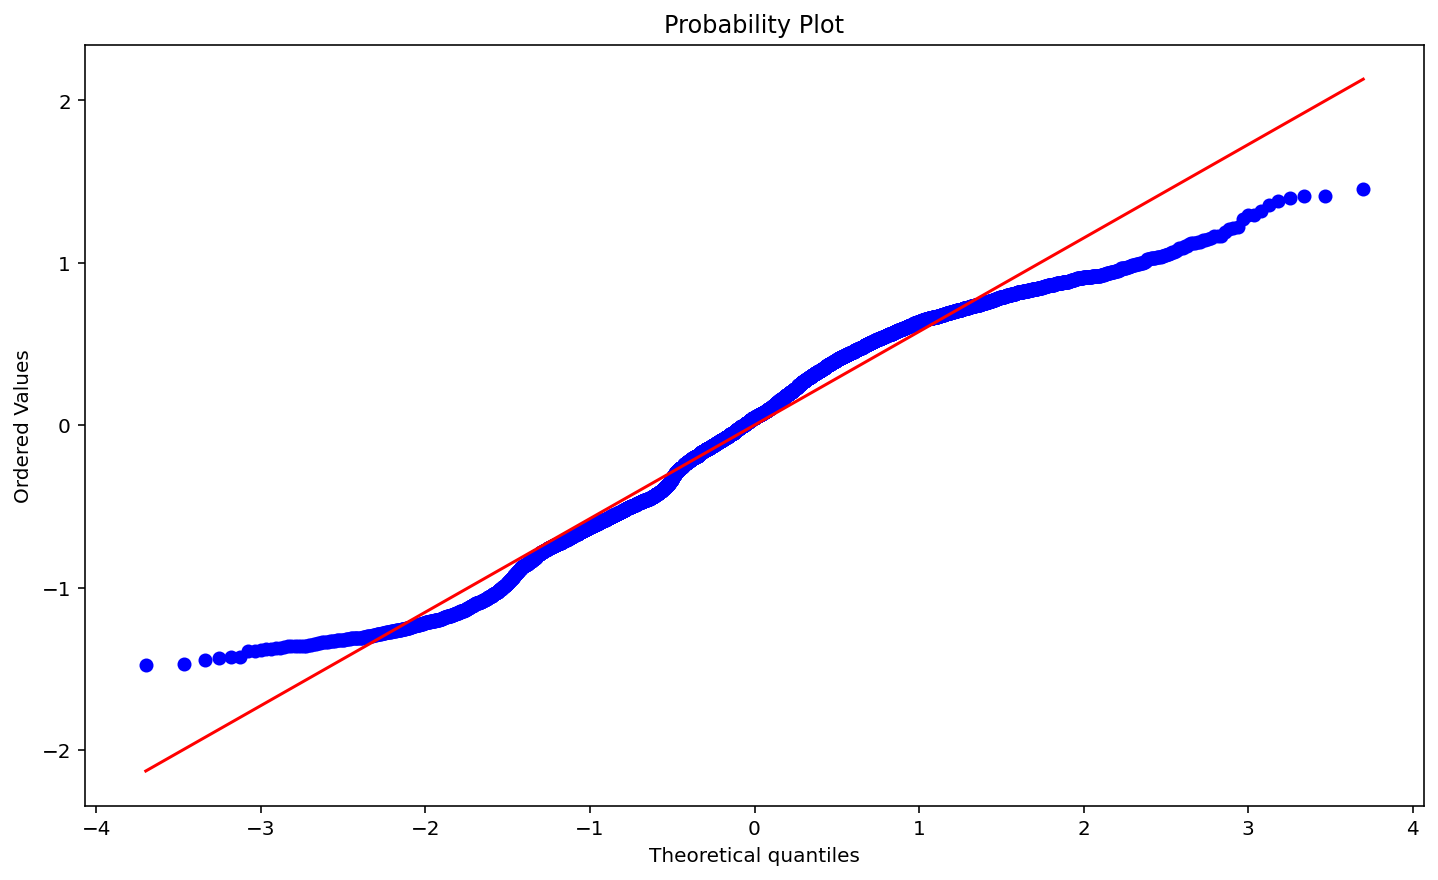

In [31]:
# Verificando a suposição de que os erros têm distribuição Normal

stats.probplot(logresults.resid, dist='norm', plot=plt);

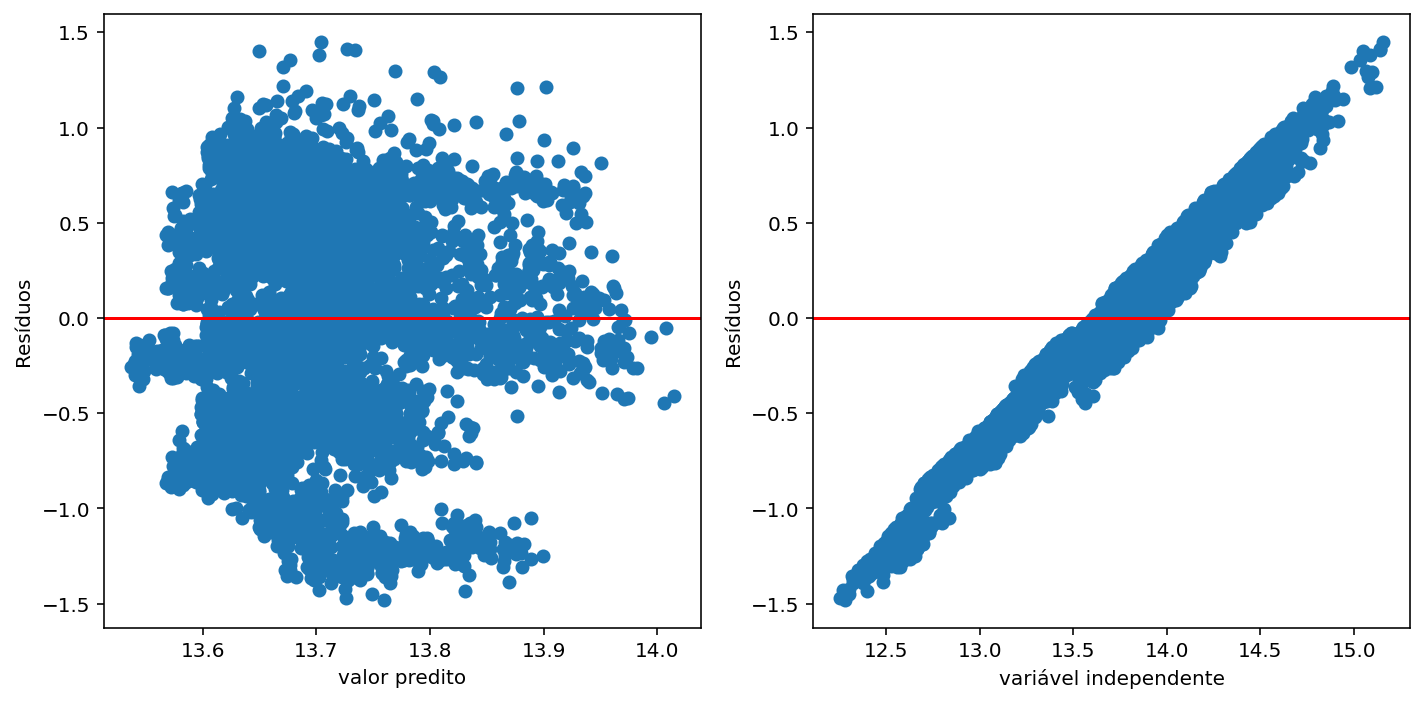

In [32]:
# Verificando a suposição de homocedasticidade na escala log:

fig = plt.figure(figsize = (10,5))

plt.subplot(121)
plt.scatter(logresults.predict(logxc), logresults.resid);
plt.axhline(y = 0, color = 'r', linestyle = '-');
plt.ylabel('Resíduos')
plt.xlabel('valor predito')

plt.subplot(122)
plt.scatter(logy, logresults.resid); # o valor da variável aleatórias está correto ?
plt.axhline(y = 0, color = 'r', linestyle = '-');
plt.ylabel('Resíduos')
plt.xlabel('variável independente')

plt.tight_layout()
plt.show()

## - Processo e Estatísticas de Validação -

## - Conclusão -

## - Referências Bibliográficas -

Commit:
    
Membros: Andressa, Camila, Luiz, Matheus